In [1]:
import numpy as np
import pandas as pd
from datetime import date
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
end_of_season_columns_to_keep = [
    'assists', 
    'bonus', 
    'bps', 
    'cost_change_start',
    'chance_of_playing_next_round',
    'clean_sheets', 
    'code', 
    'creativity', 
    'dreamteam_count', 
    'element_type', 
    'ep_next',
    'ep_this',
    'event_points',
    'form',
    'goals_conceded', 
    'goals_scored', 
    'ict_index', 
    'in_dreamteam',
    'influence', 
    'minutes', 
    'now_cost', 
    'own_goals', 
    'penalties_missed',
    'penalties_saved', 
    'points_per_game', 
    'red_cards', 
    'saves',
    'selected_by_percent', 
    'special', 
    'squad_number', 
    'status', 
    'team_code', 
    'threat', 
    'total_points', 
    'value_form', 
    'value_season',
    'transfers_in',
    'transfers_out',
    'web_name', 
    'yellow_cards',
]

In [3]:
def transform_player_data(player_data):
    player_data['code_season'] = player_data['code'].astype(str) + player_data['season']
    player_data['net_transfers'] = player_data['transfers_in'] - player_data['transfers_out']
    player_data['change_in_start_cost'] = player_data['start_cost_new_season'] - player_data['start_cost_previous_season']
    player_data['change_in_squad_number'] = np.where(player_data['squad_number_new_season'] != player_data['squad_number_previous_season'], 1, 0)
    player_data['perc_change_in_perc_selected_by'] = np.where(player_data['selected_by_percent_previous_season'] > 0, (player_data['selected_by_percent_new_season'] - player_data['selected_by_percent_previous_season'] / player_data['selected_by_percent_previous_season']), player_data['selected_by_percent_new_season'] / 100)
    player_data['points_per_minute'] = np.where(player_data['minutes_previous_season'] > 0, player_data['total_points_previous_season'] / player_data['minutes_previous_season'], 0)
    player_data['in_dreamteam'] = np.where(player_data['in_dreamteam'] == True, 1, 0)
    player_data['special'] = np.where(player_data['special'] == True, 1, 0)
    player_data['goalie'] = np.where(player_data['element_type'] == 1, 1, 0)
    player_data['defender'] = np.where(player_data['element_type'] == 2, 1, 0)
    player_data['midfielder'] = np.where(player_data['element_type'] == 3, 1, 0)
    player_data['forward'] = np.where(player_data['element_type'] == 4, 1, 0)
    player_data['points_per_million_unit_price_previous_season'] = player_data['total_points_previous_season'] / player_data['start_cost_previous_season']
    player_data.set_index('code_season', inplace=True)

    player_names = player_data[['code', 'web_name', 'start_cost_new_season', 'total_points_previous_season']].copy()

    player_data.drop(columns=[
        'code', 
        'status', 
        'web_name', 
        'season', 
        'squad_number_new_season', 
        'squad_number_previous_season'
    ], inplace=True)

    # Drop because not useful features
    player_data.drop(columns=[
        'minutes_new_season', 
        'dreamteam_count', 
        'ep_next', 
        'ep_this', 
        'event_points',
        'creativity',
        'threat',
        'influence',
        'in_dreamteam',
        'now_cost_new_season',
        'element_type',
        'bonus',
        'clean_sheets',
        'assists',
        'goals_scored',
        'goals_conceded',
        'ict_index',
        'own_goals',
        'penalties_missed',
        'penalties_saved',
        'total_points_previous_season',
        'cost_change_start_new_season',
        'red_cards',
        'yellow_cards',
        'saves',
        'special',
        'points_per_game',
        'value_season',
        'bps',
        'minutes_previous_season',
        'value_form',
        'transfers_out',
        'start_cost_new_season',
        'start_cost_previous_season',
        'selected_by_percent_new_season',
        'selected_by_percent_previous_season',
        'team_code',
        'chance_of_playing_next_round',
    ], inplace=True)
    
    return player_data, player_names


In [4]:
players_end_of_season_16_17 = pd.read_csv('../vaastav_data/data/2016-17/players_raw.csv')[end_of_season_columns_to_keep].copy()
players_end_of_season_16_17['season'] = '_16/17'
players_end_of_season_16_17['start_cost'] = players_end_of_season_16_17['now_cost'] - players_end_of_season_16_17['cost_change_start']
players_end_of_season_17_18 = pd.read_csv('../vaastav_data/data/2017-18/players_raw.csv')[end_of_season_columns_to_keep].copy()
players_end_of_season_17_18['season'] = '_17/18'
players_end_of_season_17_18['start_cost'] = players_end_of_season_17_18['now_cost'] - players_end_of_season_17_18['cost_change_start']
players_end_of_season_18_19 = pd.read_csv('../vaastav_data/data/2018-19/players_raw.csv')[end_of_season_columns_to_keep].copy()
players_end_of_season_18_19['season'] = '_18/19'
players_end_of_season_18_19['start_cost'] = players_end_of_season_18_19['now_cost'] - players_end_of_season_18_19['cost_change_start']

players_end_of_season_16_17 = players_end_of_season_16_17.merge(
    players_end_of_season_17_18[['code', 'cost_change_start', 'minutes', 'now_cost', 'selected_by_percent', 'total_points', 'start_cost', 'squad_number']],
    on='code',
    how='inner',
    suffixes=('_previous_season', '_new_season')
)
players_end_of_season_17_18 = players_end_of_season_17_18.merge(
    players_end_of_season_18_19[['code', 'cost_change_start', 'minutes', 'now_cost', 'selected_by_percent', 'total_points', 'start_cost', 'squad_number']],
    on='code',
    how='inner',
    suffixes=('_previous_season', '_new_season')
)

players_end_of_seasons = players_end_of_season_16_17.append(players_end_of_season_17_18, ignore_index=True, sort=True)

players_end_of_seasons, player_names = transform_player_data(players_end_of_seasons)


In [5]:
players_end_of_seasons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 856 entries, 48844_16/17 to 179830_17/18
Data columns (total 15 columns):
cost_change_start_previous_season                856 non-null int64
form                                             856 non-null float64
now_cost_previous_season                         856 non-null int64
total_points_new_season                          856 non-null int64
transfers_in                                     856 non-null int64
net_transfers                                    856 non-null int64
change_in_start_cost                             856 non-null int64
change_in_squad_number                           856 non-null int64
perc_change_in_perc_selected_by                  856 non-null float64
points_per_minute                                856 non-null float64
goalie                                           856 non-null int64
defender                                         856 non-null int64
midfielder                                       856 non-nu

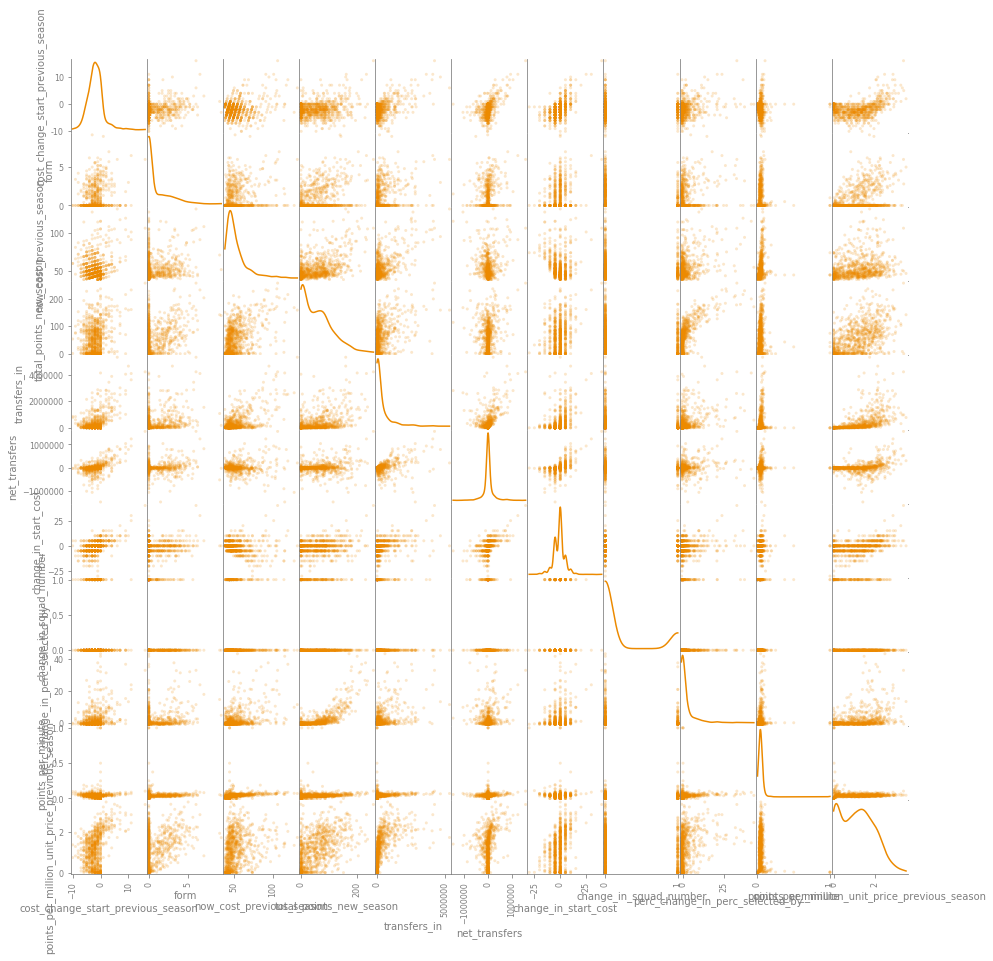

In [6]:
pd.plotting.scatter_matrix(players_end_of_seasons.drop(columns=['goalie', 'defender', 'midfielder', 'forward']), alpha=0.2, figsize=(15,15), diagonal='kde')
plt.show()

In [7]:
features_and_labels = players_end_of_seasons.sample(frac=1, random_state=814)
features_and_labels['total_points_new_season'] = np.where(features_and_labels['total_points_new_season'] == 0, 1, features_and_labels['total_points_new_season'])
features_and_labels = features_and_labels.reindex(sorted(features_and_labels.columns), axis=1)
split_test = int(features_and_labels.shape[0] * 0.8)

features = features_and_labels.drop(columns='total_points_new_season')
labels = features_and_labels['total_points_new_season']

train_y = labels[:split_test]
train_X = features[:split_test]
test_y = labels[split_test:]
test_X = features[split_test:]


In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [9]:
tree_model = DecisionTreeRegressor(random_state=170)
rf_model = RandomForestRegressor(random_state=8, n_estimators=10000, bootstrap=True)

In [10]:
tree_model.fit(train_X, train_y)
rf_model.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10000,
                      n_jobs=None, oob_score=False, random_state=8, verbose=0,
                      warm_start=False)

In [11]:
rf_model_predictions = rf_model.predict(test_X)
tree_model_predictions = tree_model.predict(test_X)

In [12]:
rf_model_mape = np.mean(np.abs((test_y - rf_model_predictions) / test_y)) * 100
tree_model_mape = np.mean(np.abs((test_y - tree_model_predictions) / test_y)) * 100
print(f"The Random Forest Model has MAPE: {rf_model_mape}. The Decision Tree Model has MAPE: {tree_model_mape} ")

The Random Forest Model has MAPE: 433.4217814373629. The Decision Tree Model has MAPE: 369.6039015704275 


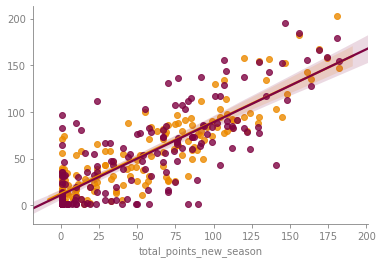

In [13]:
sns.regplot(test_y, rf_model_predictions)
sns.regplot(test_y, tree_model_predictions)

# Make predictions for this season

In [14]:
players_2019 = pd.read_csv('../vaastav_data/data/2019-20/players_raw.csv')[['code', 'cost_change_start', 'minutes', 'now_cost', 'selected_by_percent', 'total_points', 'squad_number']].copy()
players_2019['start_cost'] = players_2019['now_cost'] - players_2019['cost_change_start']

players_end_of_season_18_19_for_predictions = players_end_of_season_18_19.merge(
    players_2019[['code', 'cost_change_start', 'minutes', 'now_cost', 'selected_by_percent', 'total_points', 'start_cost', 'squad_number']],
    on='code',
    how='inner',
    suffixes=('_previous_season', '_new_season')
)

players_end_of_season_18_19_for_predictions_transformed, player_names_18_19 = transform_player_data(players_end_of_season_18_19_for_predictions)




In [15]:
features_2019 = players_end_of_season_18_19_for_predictions_transformed.drop(columns=['total_points_new_season'])
features_2019 = features_2019.reindex(sorted(features_2019.columns), axis=1)
rf_model_predictions_2019 = rf_model.predict(features_2019)


In [16]:
train_X.iloc[0]

change_in_squad_number                                0.000000
change_in_start_cost                                 -5.000000
cost_change_start_previous_season                    -2.000000
defender                                              1.000000
form                                                  3.800000
forward                                               0.000000
goalie                                                0.000000
midfielder                                            0.000000
net_transfers                                   -388131.000000
now_cost_previous_season                             53.000000
perc_change_in_perc_selected_by                       3.300000
points_per_million_unit_price_previous_season         1.472727
points_per_minute                                     0.031653
transfers_in                                     195609.000000
Name: 106611_17/18, dtype: float64

In [17]:
features_2019.iloc[0]

change_in_squad_number                                1.00000
change_in_start_cost                                  0.00000
cost_change_start_previous_season                    -1.00000
defender                                              0.00000
form                                                  3.20000
forward                                               0.00000
goalie                                                1.00000
midfielder                                            0.00000
net_transfers                                     88261.00000
now_cost_previous_season                             49.00000
perc_change_in_perc_selected_by                       3.50000
points_per_million_unit_price_previous_season         2.12000
points_per_minute                                     0.03739
transfers_in                                     339095.00000
Name: 80201_18/19, dtype: float64

In [18]:
predictions_df = pd.DataFrame({'total_points_prediction': rf_model_predictions_2019}, index=features_2019.index)
predictions_df.head(2)

,total_points_prediction
code_season,
80201_18/19,94.3742
51507_18/19,50.0803


In [19]:
player_predictions = predictions_df.merge(players_end_of_season_18_19_for_predictions.drop(columns=['total_points_new_season']), how='inner', left_index=True, right_index=True)
player_predictions = player_predictions.merge(player_names_18_19, how='inner', left_index=True, right_index=True)
player_predictions.head(2)

,total_points_prediction,cost_change_start_previous_season,form,now_cost_previous_season,transfers_in,net_transfers,change_in_start_cost,change_in_squad_number,perc_change_in_perc_selected_by,points_per_minute,goalie,defender,midfielder,forward,points_per_million_unit_price_previous_season,code,web_name,start_cost_new_season,total_points_previous_season
code_season,,,,,,,,,,,,,,,,,,,
80201_18/19,94.3742,-1,3.2,49,339095,88261,0,1,3.5,0.037390,1,0,0,0,2.120000,80201,Leno,50,106
51507_18/19,50.0803,-1,2.0,54,128478,36291,-5,1,-0.2,0.046652,0,1,0,0,1.127273,51507,Koscielny,50,62


In [20]:
player_predictions['points_per_million_unit_price_new_season'] = player_predictions['total_points_prediction'] / player_predictions['start_cost_new_season']
player_predictions.sort_values(by='points_per_million_unit_price_new_season', ascending=False).head()

,total_points_prediction,cost_change_start_previous_season,form,now_cost_previous_season,transfers_in,net_transfers,change_in_start_cost,change_in_squad_number,perc_change_in_perc_selected_by,points_per_minute,goalie,defender,midfielder,forward,points_per_million_unit_price_previous_season,code,web_name,start_cost_new_season,total_points_previous_season,points_per_million_unit_price_new_season
code_season,,,,,,,,,,,,,,,,,,,,
58786_18/19,147.2199,-1,1.6,39,283798,-143812,0,1,22.7,0.023423,0,1,0,0,0.650,58786,Kelly,40,26,3.680497
214590_18/19,199.5670,6,3.2,46,2461834,687461,15,1,31.4,0.038290,0,1,0,0,3.000,214590,Wan-Bissaka,55,120,3.628491
50093_18/19,138.7808,0,0.0,40,216655,36696,0,1,22.1,0.041667,1,0,0,0,0.375,50093,Button,40,15,3.469520
101188_18/19,205.5286,4,8.5,54,1598581,413651,10,1,26.8,0.053306,0,1,0,0,3.160,101188,Digne,60,158,3.425477
116535_18/19,203.1210,4,5.4,59,1257121,325450,5,1,31.4,0.051462,1,0,0,0,3.200,116535,Alisson,60,176,3.385350


In [21]:
player_predictions.sort_values(by='total_points_prediction', ascending=False).head()

,total_points_prediction,cost_change_start_previous_season,form,now_cost_previous_season,transfers_in,net_transfers,change_in_start_cost,change_in_squad_number,perc_change_in_perc_selected_by,points_per_minute,goalie,defender,midfielder,forward,points_per_million_unit_price_previous_season,code,web_name,start_cost_new_season,total_points_previous_season,points_per_million_unit_price_new_season
code_season,,,,,,,,,,,,,,,,,,,,
103955_18/19,222.2980,7,5.5,117,3644050,1331878,10,1,24.4,0.084477,0,0,1,0,2.127273,103955,Sterling,120,234,1.852483
110979_18/19,219.7280,8,8.4,103,4505959,1187821,20,1,23.8,0.075098,0,0,1,0,2.431579,110979,Mané,115,231,1.910678
118748_18/19,216.6502,2,8.6,132,2680675,-1072282,-5,1,35.5,0.079594,0,0,1,0,1.992308,118748,Salah,125,259,1.733202
169187_18/19,213.2447,8,10.8,58,3306874,695040,20,1,27.7,0.075203,0,1,0,0,3.700000,169187,Alexander-Arnold,70,185,3.046353
165809_18/19,212.3070,3,3.8,78,2267745,397547,5,1,28.0,0.054054,0,0,1,0,2.053333,165809,Bernardo Silva,80,154,2.653837


In [22]:
player_predictions.loc[(player_predictions['goalie'] == 1) & (player_predictions['total_points_prediction'] > 115)].sort_values(by='points_per_million_unit_price_new_season', ascending=False).head(3)


,total_points_prediction,cost_change_start_previous_season,form,now_cost_previous_season,transfers_in,net_transfers,change_in_start_cost,change_in_squad_number,perc_change_in_perc_selected_by,points_per_minute,goalie,defender,midfielder,forward,points_per_million_unit_price_previous_season,code,web_name,start_cost_new_season,total_points_previous_season,points_per_million_unit_price_new_season
code_season,,,,,,,,,,,,,,,,,,,,
50093_18/19,138.7808,0,0.0,40,216655,36696,0,1,22.1,0.041667,1,0,0,0,0.375000,50093,Button,40,15,3.469520
116535_18/19,203.1210,4,5.4,59,1257121,325450,5,1,31.4,0.051462,1,0,0,0,3.200000,116535,Alisson,60,176,3.385350
131897_18/19,135.9655,-1,3.3,44,493840,18643,0,1,15.1,0.033987,1,0,0,0,2.311111,131897,Ryan,45,104,3.021456


In [23]:
player_predictions.loc[(player_predictions['defender'] == 1) & (player_predictions['total_points_prediction'] > 115)].sort_values(by='points_per_million_unit_price_new_season', ascending=False).head(10)


,total_points_prediction,cost_change_start_previous_season,form,now_cost_previous_season,transfers_in,net_transfers,change_in_start_cost,change_in_squad_number,perc_change_in_perc_selected_by,points_per_minute,goalie,defender,midfielder,forward,points_per_million_unit_price_previous_season,code,web_name,start_cost_new_season,total_points_previous_season,points_per_million_unit_price_new_season
code_season,,,,,,,,,,,,,,,,,,,,
58786_18/19,147.2199,-1,1.6,39,283798,-143812,0,1,22.7,0.023423,0,1,0,0,0.650000,58786,Kelly,40,26,3.680497
214590_18/19,199.5670,6,3.2,46,2461834,687461,15,1,31.4,0.038290,0,1,0,0,3.000000,214590,Wan-Bissaka,55,120,3.628491
101188_18/19,205.5286,4,8.5,54,1598581,413651,10,1,26.8,0.053306,0,1,0,0,3.160000,101188,Digne,60,158,3.425477
97032_18/19,207.9544,7,7.8,67,1851310,684443,5,1,41.7,0.061466,0,1,0,0,3.466667,97032,van Dijk,65,208,3.199298
169187_18/19,213.2447,8,10.8,58,3306874,695040,20,1,27.7,0.075203,0,1,0,0,3.700000,169187,Alexander-Arnold,70,185,3.046353
122798_18/19,209.8521,7,6.6,67,2650621,927004,10,1,35.2,0.066231,0,1,0,0,3.550000,122798,Robertson,70,213,2.997887
126184_18/19,147.9739,1,4.3,51,512870,102989,0,1,15.8,0.035180,0,1,0,0,2.400000,126184,Aké,50,120,2.959478
146941_18/19,168.2874,8,7.7,63,2316984,843817,10,1,20.9,0.057919,0,1,0,0,3.218182,146941,Laporte,65,177,2.589037
58621_18/19,146.2771,-1,5.5,64,912325,-80046,-5,1,13.6,0.054035,0,1,0,0,2.307692,58621,Walker,60,150,2.437952


In [24]:
player_predictions.loc[(player_predictions['midfielder'] == 1)  & (player_predictions['total_points_prediction'] > 115)].sort_values(by='points_per_million_unit_price_new_season', ascending=False).head(10)


,total_points_prediction,cost_change_start_previous_season,form,now_cost_previous_season,transfers_in,net_transfers,change_in_start_cost,change_in_squad_number,perc_change_in_perc_selected_by,points_per_minute,goalie,defender,midfielder,forward,points_per_million_unit_price_previous_season,code,web_name,start_cost_new_season,total_points_previous_season,points_per_million_unit_price_new_season
code_season,,,,,,,,,,,,,,,,,,,,
151589_18/19,128.6464,-2,3.0,43,63174,3932,0,1,10.5,0.032765,0,0,1,0,1.066667,151589,Dendoncker,45,48,2.858809
116594_18/19,140.4015,-1,2.2,49,1254433,-328133,0,1,15.3,0.037516,0,0,1,0,2.320000,116594,Kanté,50,116,2.808030
165809_18/19,212.3070,3,3.8,78,2267745,397547,5,1,28.0,0.054054,0,0,1,0,2.053333,165809,Bernardo Silva,80,154,2.653837
94924_18/19,155.2933,2,4.5,57,936457,413219,10,1,12.8,0.064438,0,0,1,0,2.418182,94924,Deulofeu,65,133,2.389128
194634_18/19,151.5929,-2,5.2,63,903140,197907,0,1,12.3,0.059099,0,0,1,0,2.138462,194634,Jota,65,139,2.332198
90105_18/19,171.7479,9,4.5,64,3904067,1245420,20,1,20.4,0.057188,0,0,1,0,3.290909,90105,Fraser,75,181,2.289972
101537_18/19,155.5574,-2,3.6,68,2547937,230582,0,1,12.1,0.050903,0,0,1,0,2.214286,101537,Felipe Anderson,70,155,2.222249
172780_18/19,153.8554,1,3.3,66,1935920,203201,5,1,15.0,0.048393,0,0,1,0,2.107692,172780,Maddison,70,137,2.197934
66975_18/19,151.9938,0,3.6,65,993901,155549,5,1,12.0,0.048538,0,0,1,0,2.553846,66975,Milivojevic,70,166,2.171340


In [25]:
player_predictions.loc[(player_predictions['forward'] == 1) & (player_predictions['total_points_prediction'] > 115)].sort_values(by='points_per_million_unit_price_new_season', ascending=False).head(4)

,total_points_prediction,cost_change_start_previous_season,form,now_cost_previous_season,transfers_in,net_transfers,change_in_start_cost,change_in_squad_number,perc_change_in_perc_selected_by,points_per_minute,goalie,defender,midfielder,forward,points_per_million_unit_price_previous_season,code,web_name,start_cost_new_season,total_points_previous_season,points_per_million_unit_price_new_season
code_season,,,,,,,,,,,,,,,,,,,,
82403_18/19,193.4564,0,5.4,70,1665204,-797514,0,1,29.9,0.047086,0,0,0,1,2.042857,82403,Zaha,70,143,2.763663
102057_18/19,205.7253,14,3.0,69,4114072,1779438,20,1,39.1,0.058162,0,0,0,1,3.290909,102057,Jiménez,75,181,2.743004
78007_18/19,157.6968,-1,3.0,64,1054144,-125049,0,1,19.9,0.047587,0,0,0,1,2.169231,78007,King,65,141,2.426105
168580_18/19,148.8218,-4,8.3,61,294716,44236,0,1,11.2,0.048354,0,0,0,1,2.169231,168580,Pérez,65,141,2.289566


In [26]:
player_predictions['biggest_change'] = player_predictions['total_points_prediction'] - player_predictions['total_points_previous_season']
player_predictions.loc[player_predictions['total_points_prediction'] > 100].sort_values('biggest_change', ascending=False).head(10)

,total_points_prediction,cost_change_start_previous_season,form,now_cost_previous_season,transfers_in,net_transfers,change_in_start_cost,change_in_squad_number,perc_change_in_perc_selected_by,points_per_minute,...,defender,midfielder,forward,points_per_million_unit_price_previous_season,code,web_name,start_cost_new_season,total_points_previous_season,points_per_million_unit_price_new_season,biggest_change
code_season,,,,,,,,,,,,,,,,,,,,,
50093_18/19,138.7808,0,0.0,40,216655,36696,0,1,22.1,0.041667,...,0,0,0,0.375000,50093,Button,40,15,3.469520,123.7808
58786_18/19,147.2199,-1,1.6,39,283798,-143812,0,1,22.7,0.023423,...,1,0,0,0.650000,58786,Kelly,40,26,3.680497,121.2199
61366_18/19,158.4189,-4,2.2,96,539824,-1170571,-5,1,11.5,0.060950,...,0,1,0,0.590000,61366,De Bruyne,95,59,1.667567,99.4189
151589_18/19,128.6464,-2,3.0,43,63174,3932,0,1,10.5,0.032765,...,0,1,0,1.066667,151589,Dendoncker,45,48,2.858809,80.6464
214590_18/19,199.5670,6,3.2,46,2461834,687461,15,1,31.4,0.038290,...,1,0,0,3.000000,214590,Wan-Bissaka,55,120,3.628491,79.5670
37265_18/19,105.9512,-5,0.5,100,57598,-442887,-35,1,3.4,0.054085,...,0,1,0,0.447619,37265,Sánchez,70,47,1.513589,58.9512
165809_18/19,212.3070,3,3.8,78,2267745,397547,5,1,28.0,0.054054,...,0,1,0,2.053333,165809,Bernardo Silva,80,154,2.653837,58.3070
166989_18/19,114.0486,0,4.8,60,234624,104955,5,1,4.7,0.057958,...,0,1,0,1.050000,166989,Tielemans,65,63,1.754594,51.0486
82403_18/19,193.4564,0,5.4,70,1665204,-797514,0,1,29.9,0.047086,...,0,0,1,2.042857,82403,Zaha,70,143,2.763663,50.4564


In [27]:
player_predictions.loc[player_predictions['total_points_prediction'] > 100].sort_values('total_points_prediction', ascending=False).head(10)

,total_points_prediction,cost_change_start_previous_season,form,now_cost_previous_season,transfers_in,net_transfers,change_in_start_cost,change_in_squad_number,perc_change_in_perc_selected_by,points_per_minute,...,defender,midfielder,forward,points_per_million_unit_price_previous_season,code,web_name,start_cost_new_season,total_points_previous_season,points_per_million_unit_price_new_season,biggest_change
code_season,,,,,,,,,,,,,,,,,,,,,
103955_18/19,222.2980,7,5.5,117,3644050,1331878,10,1,24.4,0.084477,...,0,1,0,2.127273,103955,Sterling,120,234,1.852483,-11.7020
110979_18/19,219.7280,8,8.4,103,4505959,1187821,20,1,23.8,0.075098,...,0,1,0,2.431579,110979,Mané,115,231,1.910678,-11.2720
118748_18/19,216.6502,2,8.6,132,2680675,-1072282,-5,1,35.5,0.079594,...,0,1,0,1.992308,118748,Salah,125,259,1.733202,-42.3498
169187_18/19,213.2447,8,10.8,58,3306874,695040,20,1,27.7,0.075203,...,1,0,0,3.700000,169187,Alexander-Arnold,70,185,3.046353,28.2447
165809_18/19,212.3070,3,3.8,78,2267745,397547,5,1,28.0,0.054054,...,0,1,0,2.053333,165809,Bernardo Silva,80,154,2.653837,58.3070
122798_18/19,209.8521,7,6.6,67,2650621,927004,10,1,35.2,0.066231,...,1,0,0,3.550000,122798,Robertson,70,213,2.997887,-3.1479
97032_18/19,207.9544,7,7.8,67,1851310,684443,5,1,41.7,0.061466,...,1,0,0,3.466667,97032,van Dijk,65,208,3.199298,-0.0456
102057_18/19,205.7253,14,3.0,69,4114072,1779438,20,1,39.1,0.058162,...,0,0,1,3.290909,102057,Jiménez,75,181,2.743004,24.7253
101188_18/19,205.5286,4,8.5,54,1598581,413651,10,1,26.8,0.053306,...,1,0,0,3.160000,101188,Digne,60,158,3.425477,47.5286


In [29]:
player_predictions.loc[player_predictions['web_name'] == 'Ward-Prowse'].sort_values('total_points_prediction', ascending=False).head(10)


,total_points_prediction,cost_change_start_previous_season,form,now_cost_previous_season,transfers_in,net_transfers,change_in_start_cost,change_in_squad_number,perc_change_in_perc_selected_by,points_per_minute,...,defender,midfielder,forward,points_per_million_unit_price_previous_season,code,web_name,start_cost_new_season,total_points_previous_season,points_per_million_unit_price_new_season,biggest_change
code_season,,,,,,,,,,,,,,,,,,,,,
101178_18/19,84.8767,-4,3.0,51,400260,199293,5,1,0.6,0.048454,...,0,1,0,1.709091,101178,Ward-Prowse,60,94,1.414612,-9.1233
